In [1]:
experimento = 'Experimento para buscar numero optimo de neuronas (900-1200) en la capa oculta 5000 samples'

In [3]:
#Importamos las librerias necesarias
import torch
import numpy as np
import pandas as pd
import Modulo_MLP
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
def evaluate_aux(model, test_loader):
        """
        Evalua el modelo previamente entrnado
        Argumentos de entrada: modelo, conjunto de test
        """
        model.eval()
        model.to(device)
        acc = []
        with torch.no_grad():
            for batch in test_loader:
                X, y = batch
                y_hat = model(X.float())
                acc.append((y == torch.argmax(y_hat, axis=1)).sum().item() / len(y))

        return np.mean(acc)


In [5]:
#device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
#Cargamos el data set
data = pd.read_csv('C:/Users/jaime/OneDrive - Universidad de Málaga/Escritorio/Jaime/TFG/HuGaDB-master/HuGaDB_v2_Digest/DataFrameFinal.csv')

#Elimino las filas con algún valor de columna vacio 
data = data.dropna()

In [2]:
print(f'\033[5;35m EXPERIMENTO --> {experimento} \033[0;m')

 EXPERIMENTO --> Experimento para buscar numero optimo de neuronas (900-1200) en la capa oculta 5000 samples 


In [8]:
#hyper parameters
    #Numero de muestras del todo el dataset, numero de entradas de la red, numero de clases a clasificar, 
    # numero de neuronas en la capa oculta, numero de epocas, numero de lotes, tasa de aprendizaje, k del K-Fold

nSamples = 5000

input_size = 38
num_classes = 12

# hidden_size = 100
num_epochs = 500
batch_size = 256
learning_rate = 0.001
num_splits = 10

nTest = 0.2

class_names = ['Walking', 'Running', 'Going up', 'Going down', 'Sitting', 'Sitting down', 'Standing up', 'Standing', 
                'Up by elevator',  'Down by elevator'] 

In [9]:
# Obtengo un subconjunto del data set original 
# TODO Conocer la distribución de cada clase 
df = data
df = df[0:nSamples]

In [10]:
# df = df[(df.act == 1) | (df.act == 2) | (df.act == 3) | (df.act == 4) | (df.act == 5) | (df.act == 6) | (df.act == 7) 
#         | (df.act == 8) | (df.act == 10) | (df.act == 11)]
# # Elimino las muesta correpondientes a las actividades subir y bajar ascensor(10, 11)

# df = df[(df.act == 1) | (df.act == 2) | (df.act == 3) | (df.act == 4) | (df.act == 5) | (df.act == 6) | (df.act == 7) 
#         | (df.act == 8) | (df.act == 9) | (df.act == 12)]

# df = df[(df.act == 8) | (df.act == 10) | (df.act == 11)]

In [11]:
#Divido el conjunto de muestras en variable clasificatoria(y) y las demas(X)

X = df.drop(['act'], axis = 'columns')
# X.head()

y = df.act
# y.head()

num of samples: 5000
[1345, 310, 617, 497, 383, 90, 94, 999, 0, 366, 299, 0]


<BarContainer object of 12 artists>

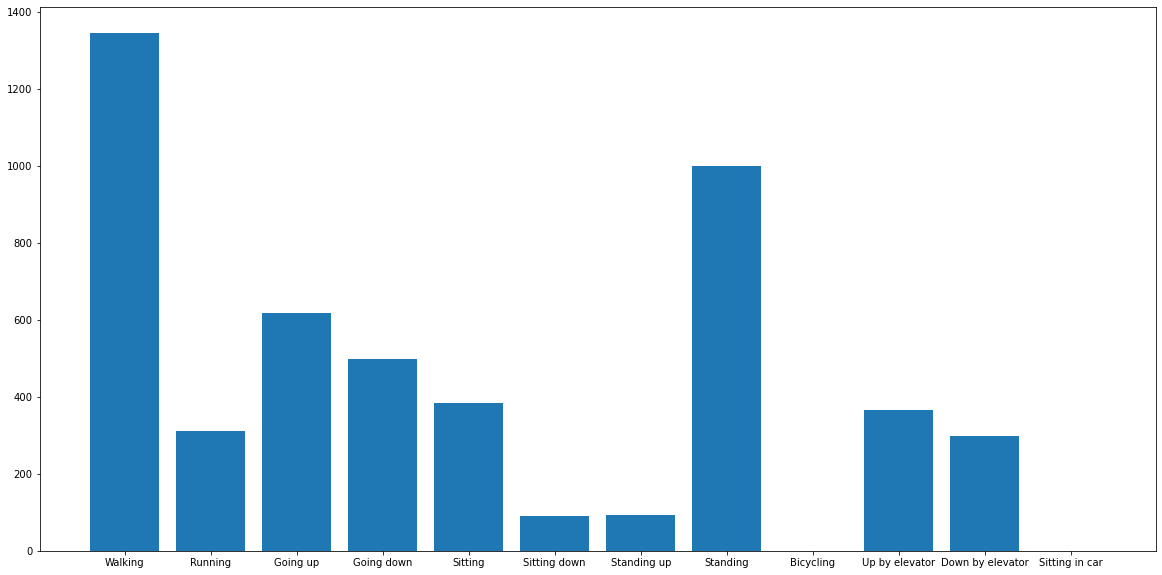

In [12]:
x_values = ['Walking', 'Running', 'Going up', 'Going down', 'Sitting', 'Sitting down', 'Standing up', 'Standing', 
               'Bicycling', 'Up by elevator',  'Down by elevator',  'Sitting in car']

y_values = []
y_values.append((df[(df.act == 1)]).shape[0])
y_values.append((df[(df.act == 2)]).shape[0])
y_values.append((df[(df.act == 3)]).shape[0])
y_values.append((df[(df.act == 4)]).shape[0])
y_values.append((df[(df.act == 5)]).shape[0])
y_values.append((df[(df.act == 6)]).shape[0])
y_values.append((df[(df.act == 7)]).shape[0])
y_values.append((df[(df.act == 8)]).shape[0])
y_values.append((df[(df.act == 9)]).shape[0])
y_values.append((df[(df.act == 10)]).shape[0])
y_values.append((df[(df.act == 11)]).shape[0])
y_values.append((df[(df.act == 12)]).shape[0])
print(f'num of samples: {sum(y_values)}')
print(y_values)
plt.figure(figsize=(20,10))
plt.bar(x_values, y_values, width=0.8)            

In [13]:
# # Porcentaje de cada clase en un conjunto de datos
# s = sum(y_values)
# w = 0
# for x in y_values:
#     y = x * 100
#     z = y / s
#     w = w + z
#     print(f'La muestra es {x} y su porcentaje es {z}')
# print(f'Total: {w}')

In [14]:
#Obtengo los valores de los conjuntos anteriores
X_val = X.values
y_val = y.values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_val,y_val,test_size=nTest, random_state=0)

In [16]:
# modelo_pre_train = torch.jit.load('modelo_final_2021-06-05_0.8053_Test.zip')
# evaluate_aux(modelo_pre_train, test_loader)
modelo_pre_train = None

============ Launch with 5000 Samples, 500 Epochs, 256 Batch, 10 Splits, 0.001 lr, 900 Hidden neurons ============


loss 0.45026 acc 0.58832: 100%|█████████▉| 499/500 [00:36<00:00, 13.79it/s]

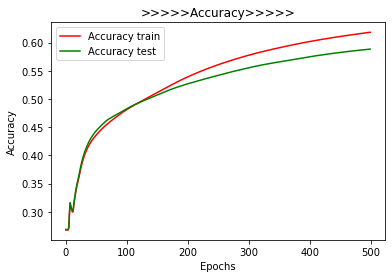

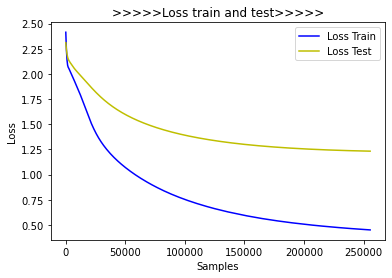

Accuracy de validación con kFold 0.6404079861111112
Accuracy Train: 0.6805 
Accuracy Test: 0.665 
Diferencia entre train y test: 0.015499999999999958

 


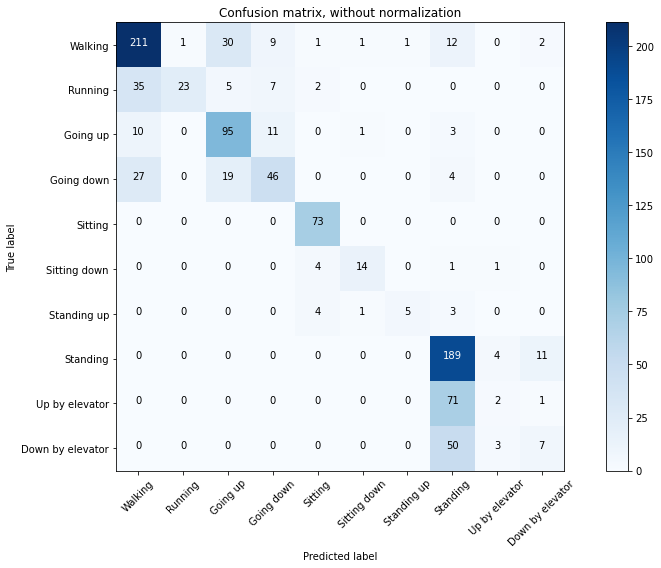

loss 0.43010 acc 0.58667: 100%|█████████▉| 499/500 [00:37<00:00, 13.26it/s]

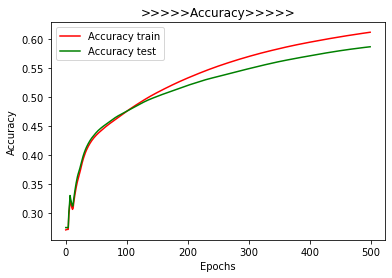

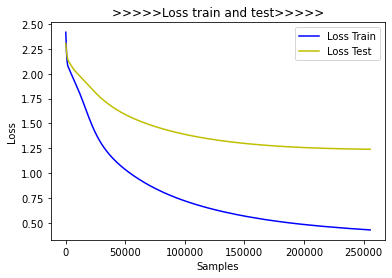

Accuracy de validación con kFold 0.6420355902777778
Accuracy Train: 0.6775 
Accuracy Test: 0.656 
Diferencia entre train y test: 0.021499999999999964

 


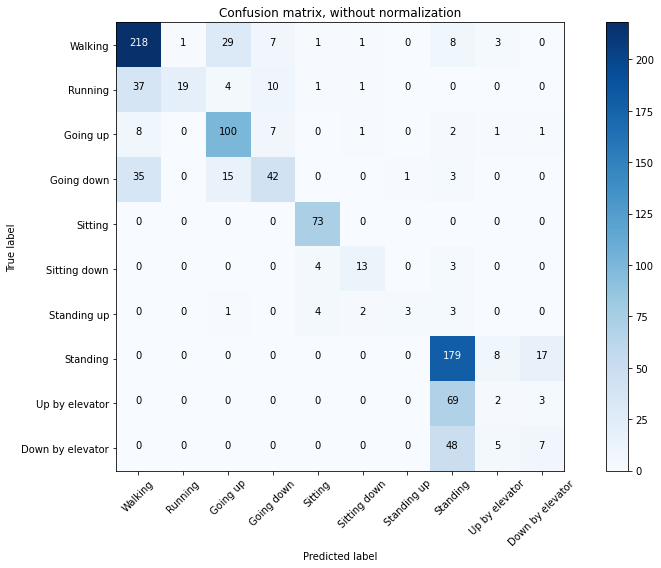

loss 0.43100 acc 0.59617: 100%|██████████| 500/500 [00:38<00:00, 13.33it/s]

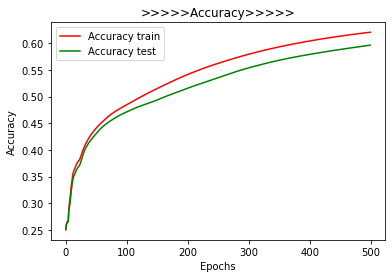

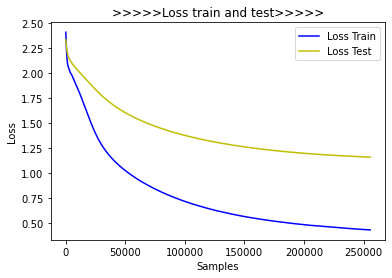

Accuracy de validación con kFold 0.6527054398148148
Accuracy Train: 0.6815 
Accuracy Test: 0.667 
Diferencia entre train y test: 0.014499999999999957

 


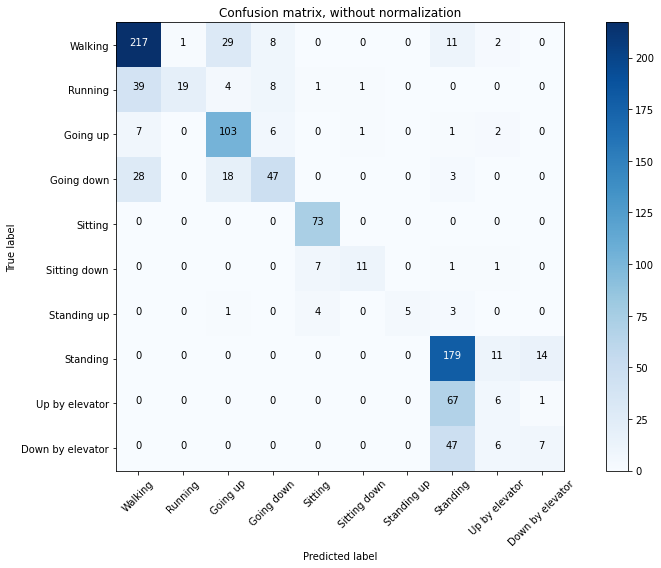

loss 0.43141 acc 0.59445: 100%|██████████| 500/500 [00:38<00:00, 13.05it/s]

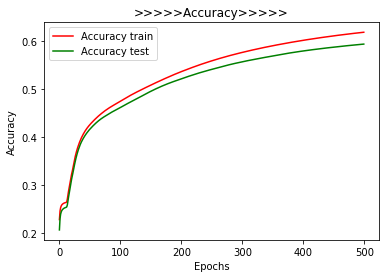

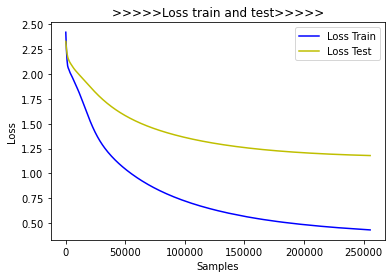

Accuracy de validación con kFold 0.6530490451388888
Accuracy Train: 0.6815 
Accuracy Test: 0.663 
Diferencia entre train y test: 0.01849999999999996

 


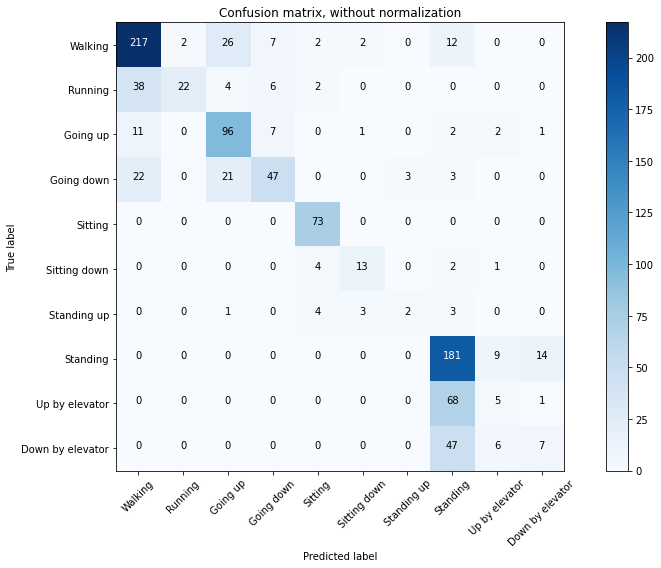

loss 0.43842 acc 0.59916: 100%|██████████| 500/500 [00:38<00:00, 13.33it/s]

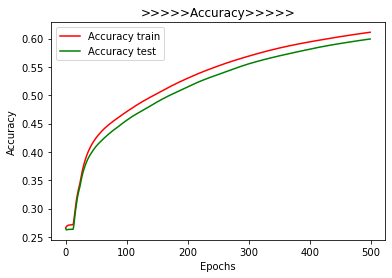

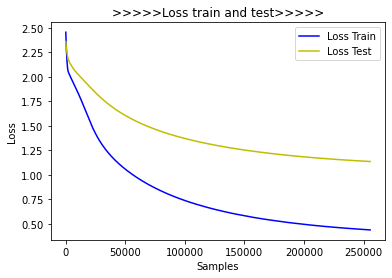

Accuracy de validación con kFold 0.6572048611111111
Accuracy Train: 0.678 
Accuracy Test: 0.653 
Diferencia entre train y test: 0.025000000000000022

 


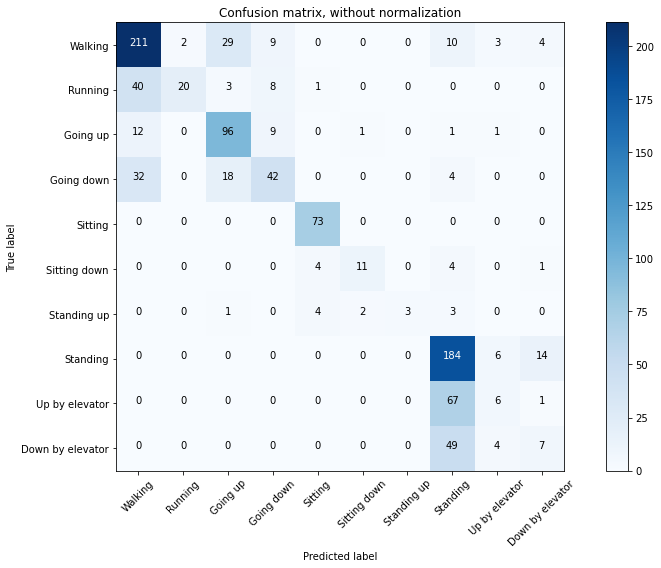

loss 0.41724 acc 0.60051: 100%|██████████| 500/500 [00:38<00:00, 13.22it/s]

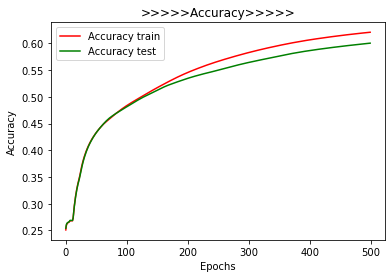

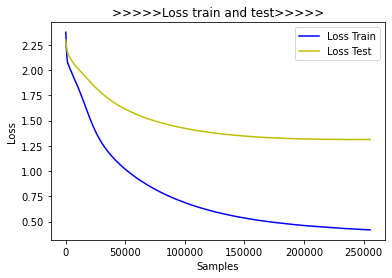

Accuracy de validación con kFold 0.6574797453703703
Accuracy Train: 0.67325 
Accuracy Test: 0.657 
Diferencia entre train y test: 0.016249999999999987

 


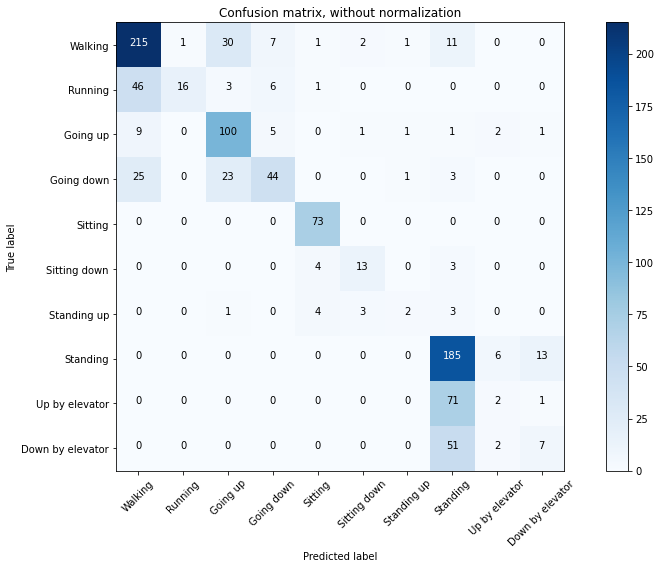

loss 0.43854 acc 0.58882: 100%|██████████| 500/500 [00:38<00:00, 13.13it/s]

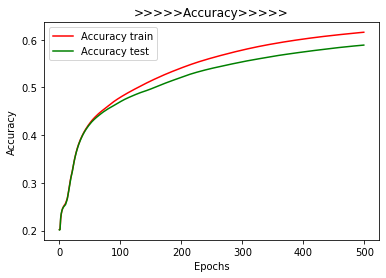

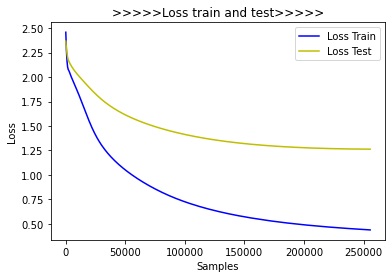

Accuracy de validación con kFold 0.6556299603174603
Accuracy Train: 0.67 
Accuracy Test: 0.651 
Diferencia entre train y test: 0.019000000000000017

 


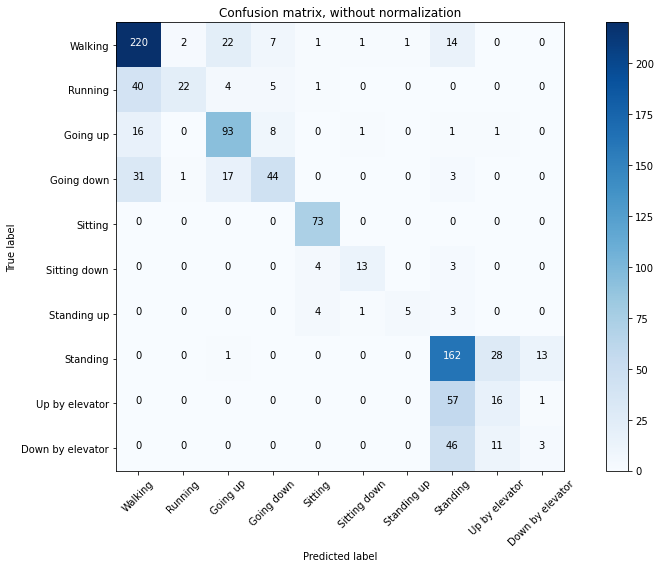

loss 0.45670 acc 0.59755: 100%|██████████| 500/500 [00:38<00:00, 13.08it/s]

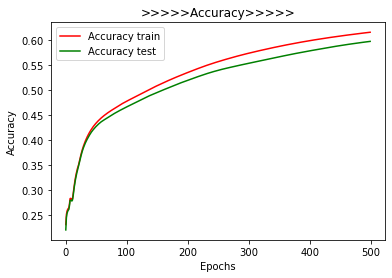

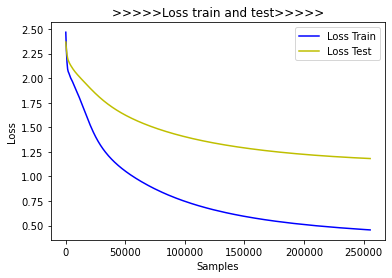

Accuracy de validación con kFold 0.6576877170138888
Accuracy Train: 0.682 
Accuracy Test: 0.661 
Diferencia entre train y test: 0.02100000000000002

 


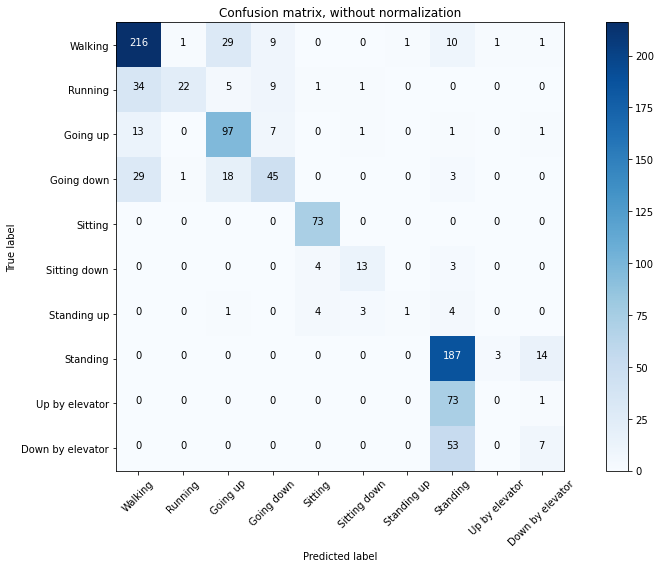

loss 0.42765 acc 0.59394: 100%|██████████| 500/500 [00:38<00:00, 13.16it/s]

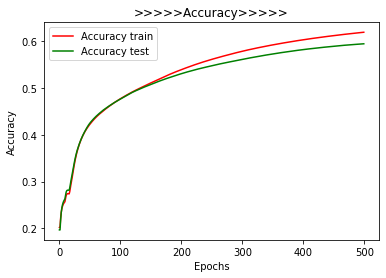

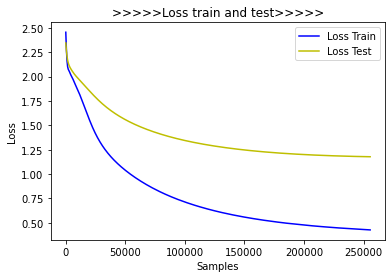

Accuracy de validación con kFold 0.6556954089506173
Accuracy Train: 0.681 
Accuracy Test: 0.648 
Diferencia entre train y test: 0.03300000000000003

 


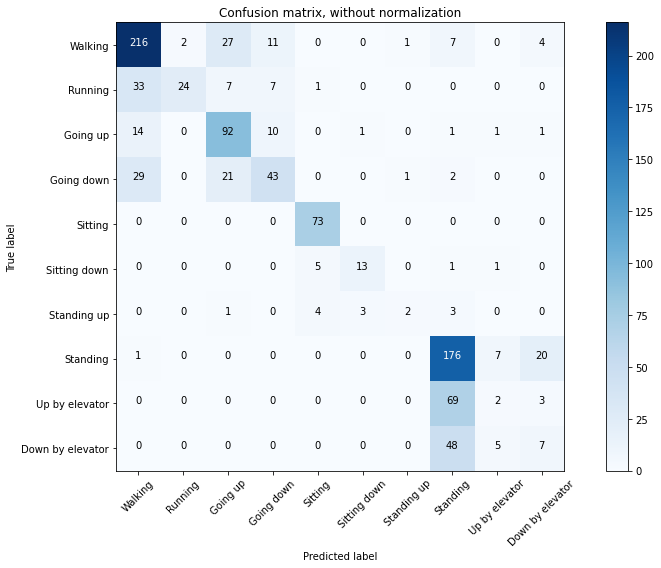

loss 0.46148 acc 0.59125: 100%|██████████| 500/500 [00:38<00:00, 13.25it/s]

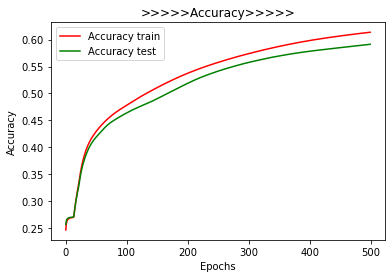

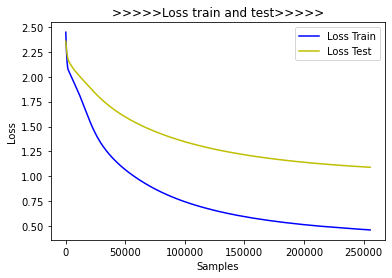

Accuracy de validación con kFold 0.6554036458333333
Accuracy Train: 0.6745 
Accuracy Test: 0.66 
Diferencia entre train y test: 0.014499999999999957

 


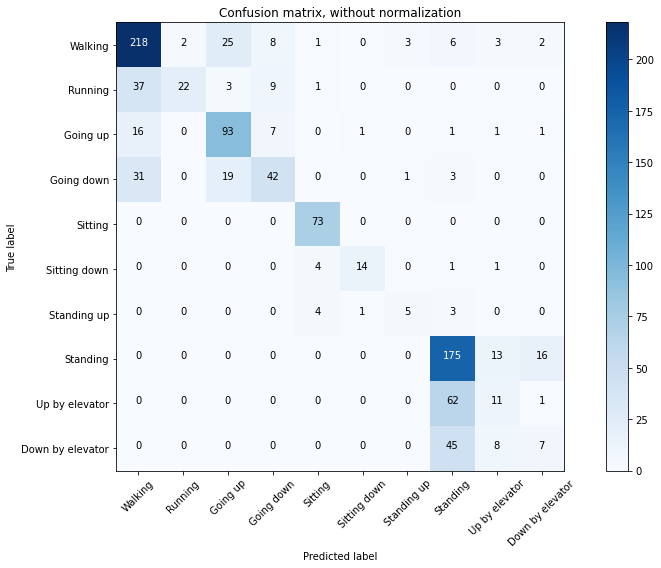

loss 2.23717 acc 0.24056:   0%|          | 1/500 [00:00<01:30,  5.49it/s]

Time: 6m 57.015625s
============ Launch with 5000 Samples, 500 Epochs, 256 Batch, 10 Splits, 0.001 lr, 1000 Hidden neurons ============


loss 0.43557 acc 0.62198: 100%|██████████| 500/500 [00:38<00:00, 12.93it/s]

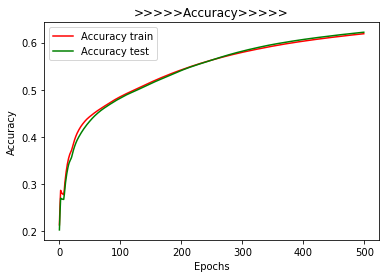

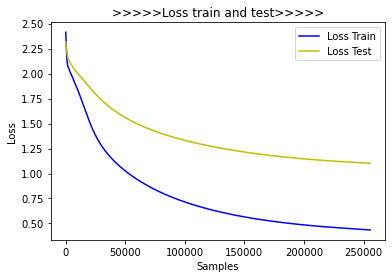

Accuracy de validación con kFold 0.6864149305555556
Accuracy Train: 0.6845 
Accuracy Test: 0.664 
Diferencia entre train y test: 0.020499999999999963

 


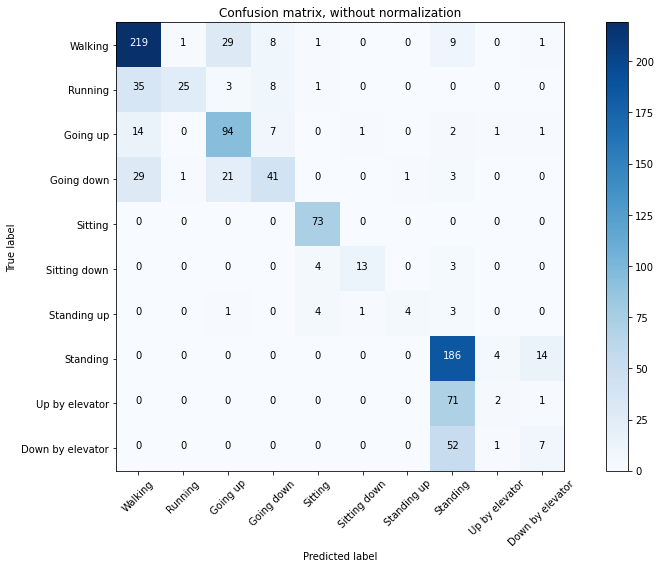

loss 0.43568 acc 0.58352: 100%|██████████| 500/500 [00:38<00:00, 13.37it/s]

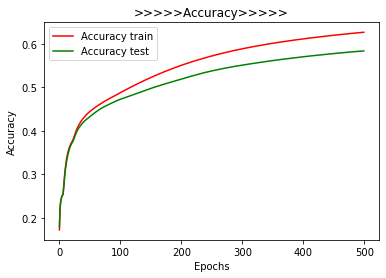

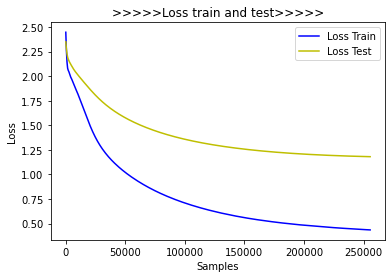

Accuracy de validación con kFold 0.6608072916666667
Accuracy Train: 0.682 
Accuracy Test: 0.668 
Diferencia entre train y test: 0.014000000000000012

 


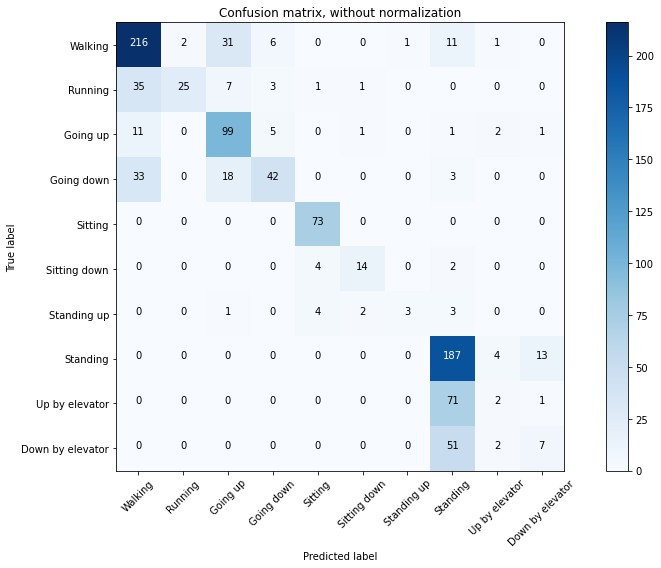

loss 0.42291 acc 0.60704: 100%|██████████| 500/500 [00:38<00:00, 13.02it/s]

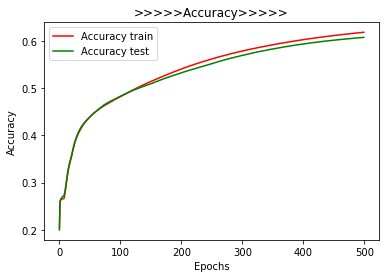

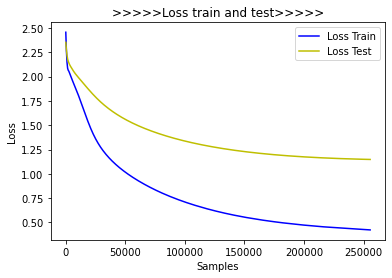

Accuracy de validación con kFold 0.6629774305555556
Accuracy Train: 0.6775 
Accuracy Test: 0.657 
Diferencia entre train y test: 0.020499999999999963

 


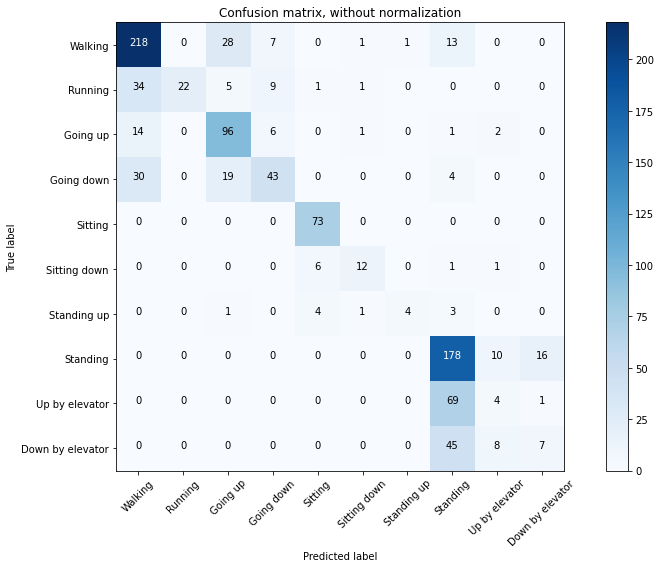

loss 0.42964 acc 0.56514: 100%|██████████| 500/500 [00:38<00:00, 12.10it/s]

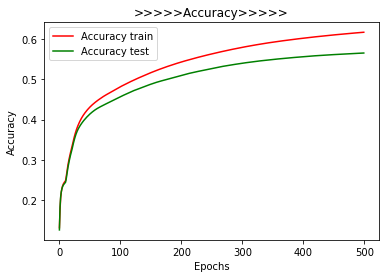

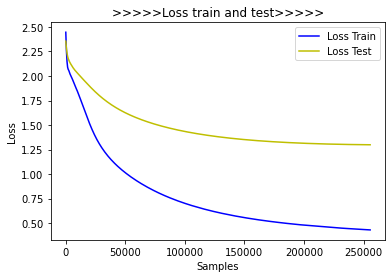

Accuracy de validación con kFold 0.64697265625
Accuracy Train: 0.66775 
Accuracy Test: 0.644 
Diferencia entre train y test: 0.023749999999999938

 


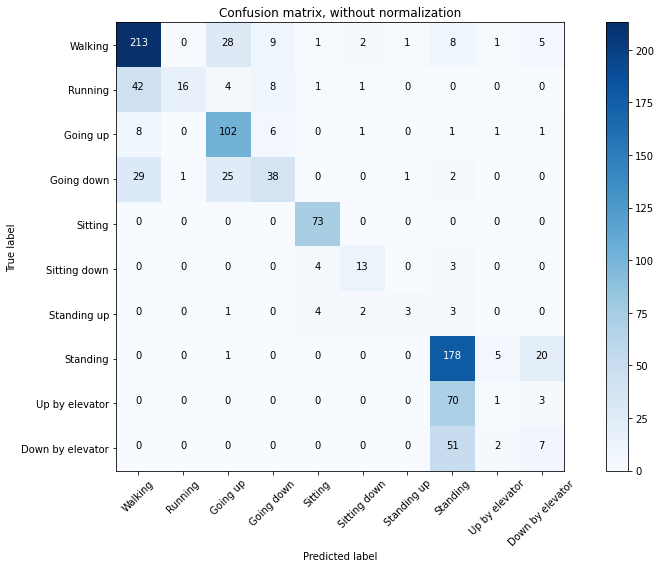

loss 0.42836 acc 0.60278: 100%|█████████▉| 499/500 [00:39<00:00, 11.81it/s]

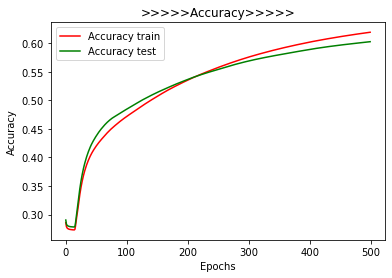

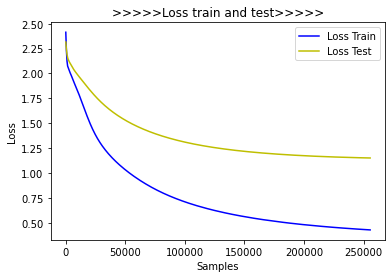

Accuracy de validación con kFold 0.6510850694444444
Accuracy Train: 0.687 
Accuracy Test: 0.659 
Diferencia entre train y test: 0.028000000000000025

 


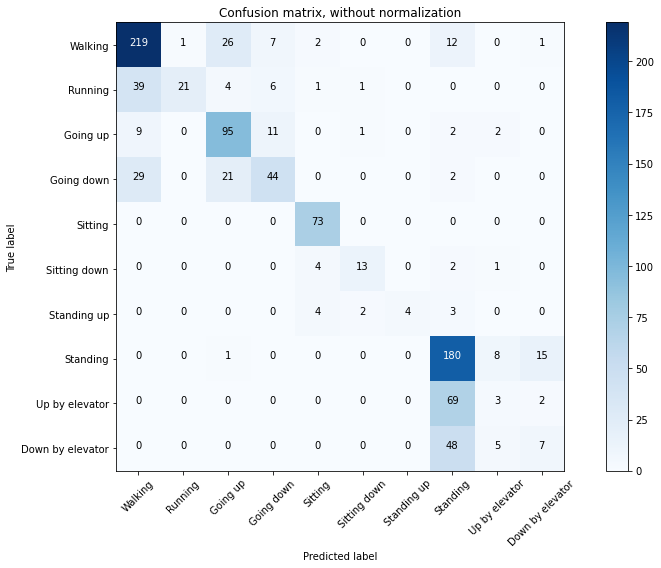

loss 0.43529 acc 0.57804: 100%|██████████| 500/500 [00:38<00:00, 13.02it/s]

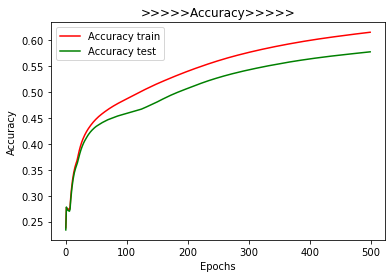

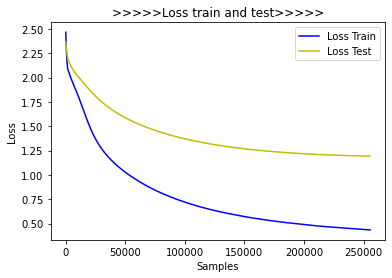

Accuracy de validación con kFold 0.6491247106481483
Accuracy Train: 0.67475 
Accuracy Test: 0.659 
Diferencia entre train y test: 0.01574999999999993

 


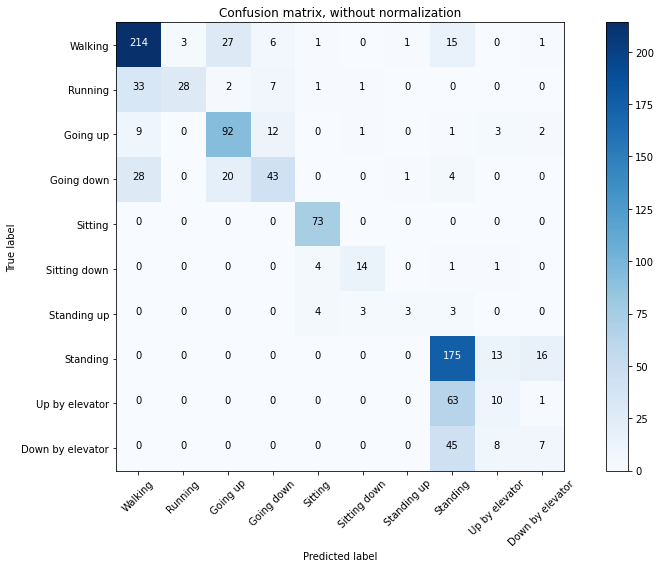

loss 0.42670 acc 0.59218: 100%|██████████| 500/500 [00:38<00:00, 12.71it/s]

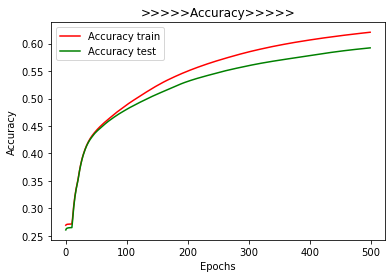

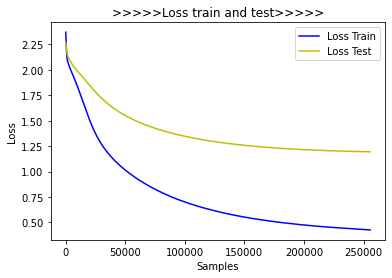

Accuracy de validación con kFold 0.6491195436507937
Accuracy Train: 0.67775 
Accuracy Test: 0.658 
Diferencia entre train y test: 0.019749999999999934

 


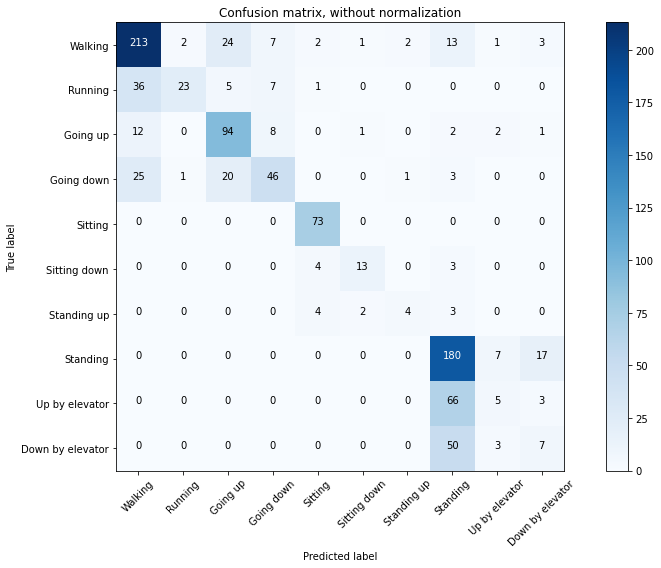

loss 0.42727 acc 0.61204: 100%|█████████▉| 499/500 [00:38<00:00, 12.97it/s]

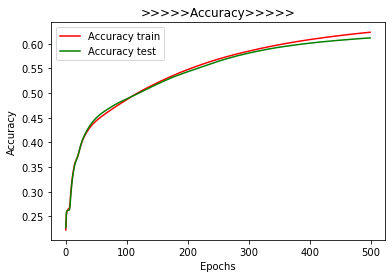

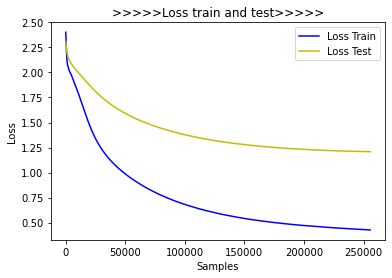

Accuracy de validación con kFold 0.6501193576388888
Accuracy Train: 0.68225 
Accuracy Test: 0.667 
Diferencia entre train y test: 0.015249999999999986

 


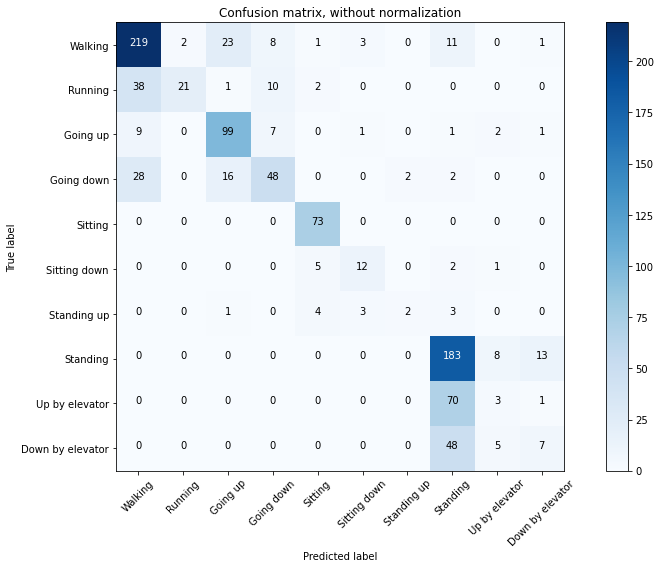

loss 0.42883 acc 0.59404: 100%|██████████| 500/500 [00:37<00:00, 13.12it/s]

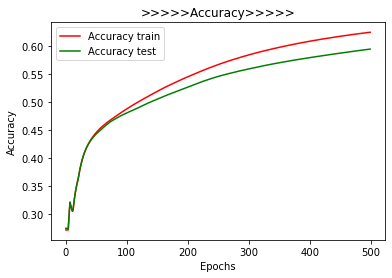

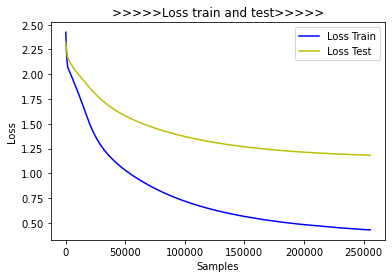

Accuracy de validación con kFold 0.6512586805555556
Accuracy Train: 0.68275 
Accuracy Test: 0.666 
Diferencia entre train y test: 0.01674999999999993

 


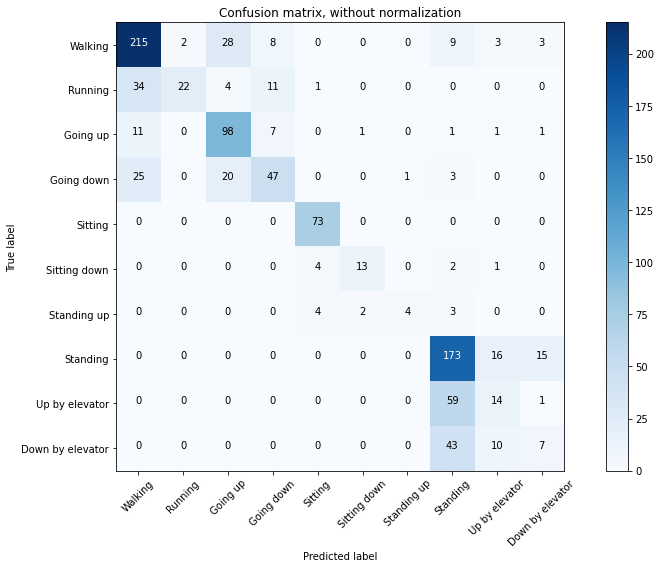

loss 0.42058 acc 0.62245: 100%|██████████| 500/500 [00:37<00:00, 12.90it/s]

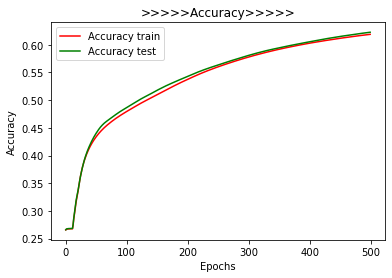

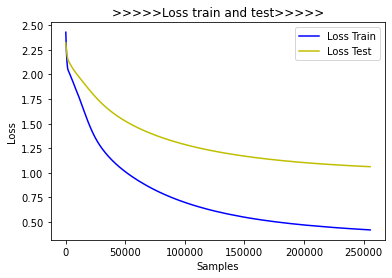

Accuracy de validación con kFold 0.6547960069444445
Accuracy Train: 0.678 
Accuracy Test: 0.644 
Diferencia entre train y test: 0.03400000000000003

 


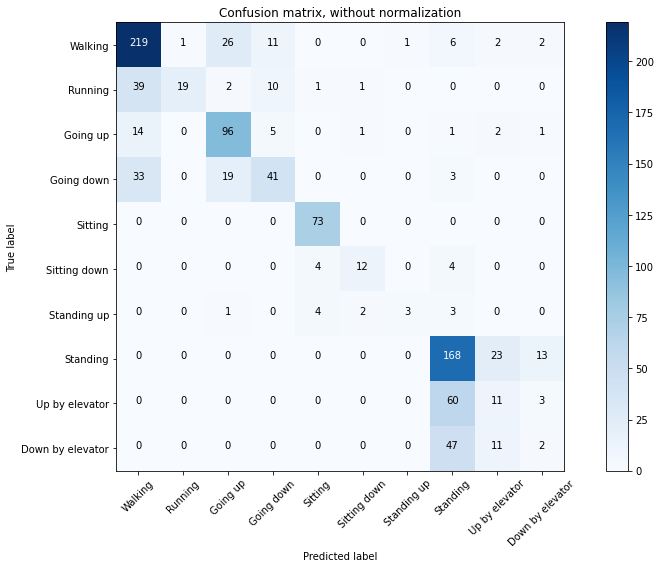

loss 2.41498 acc 0.24729:   0%|          | 1/500 [00:00<00:52,  9.46it/s]

Time: 6m 59.890625s
============ Launch with 5000 Samples, 500 Epochs, 256 Batch, 10 Splits, 0.001 lr, 1100 Hidden neurons ============


loss 0.43189 acc 0.59206: 100%|██████████| 500/500 [00:38<00:00, 12.60it/s]

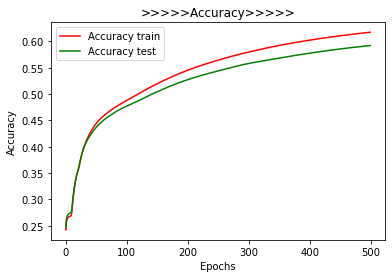

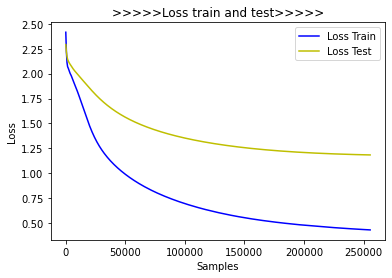

Accuracy de validación con kFold 0.6516927083333333
Accuracy Train: 0.6755 
Accuracy Test: 0.657 
Diferencia entre train y test: 0.01849999999999996

 


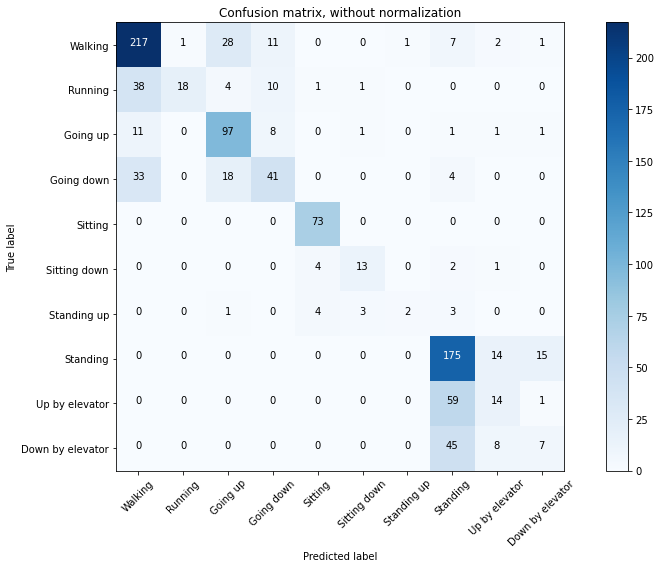

loss 0.41436 acc 0.58261: 100%|██████████| 500/500 [00:38<00:00, 12.66it/s]

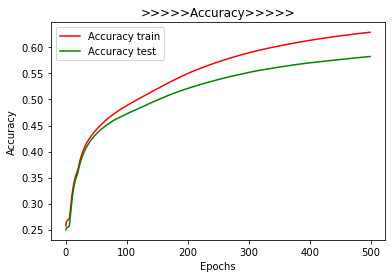

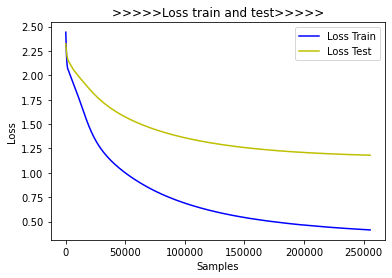

Accuracy de validación con kFold 0.64453125
Accuracy Train: 0.68375 
Accuracy Test: 0.658 
Diferencia entre train y test: 0.02574999999999994

 


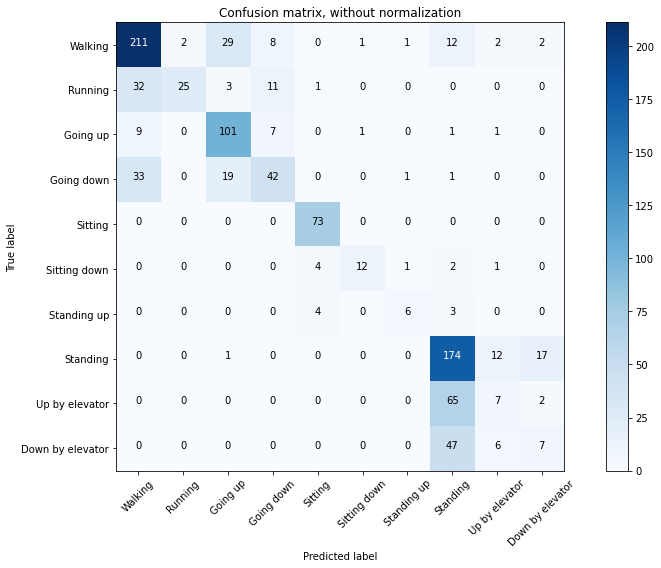

loss 0.40452 acc 0.57465: 100%|██████████| 500/500 [00:38<00:00, 12.62it/s]

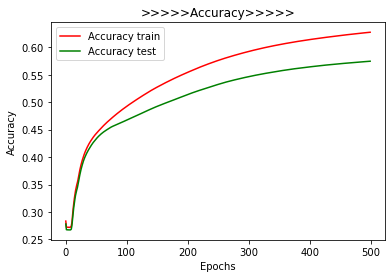

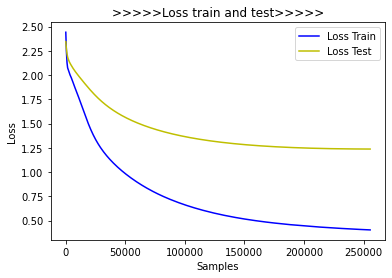

Accuracy de validación con kFold 0.6361400462962963
Accuracy Train: 0.677 
Accuracy Test: 0.665 
Diferencia entre train y test: 0.01200000000000001

 


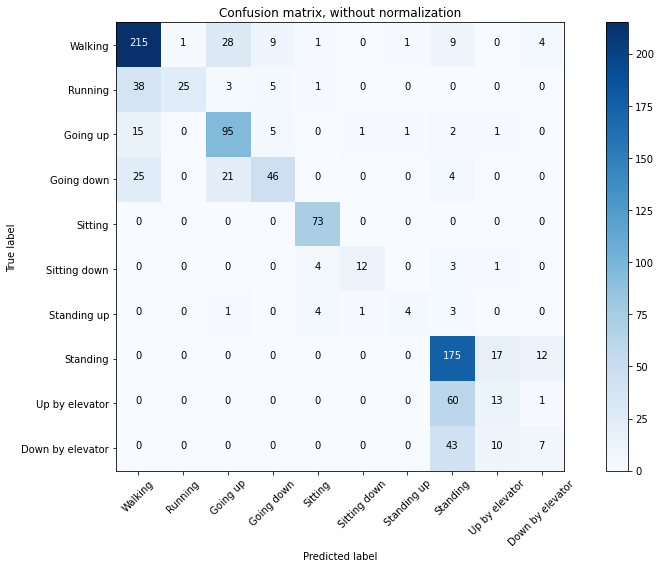

loss 0.41729 acc 0.63594: 100%|██████████| 500/500 [00:38<00:00, 11.18it/s]

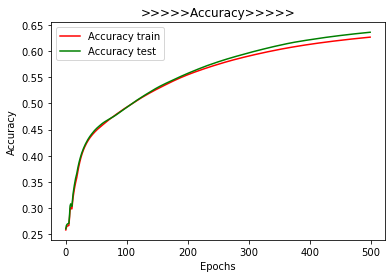

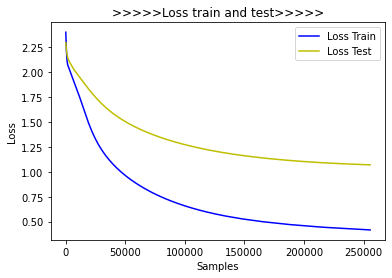

Accuracy de validación con kFold 0.6504448784722222
Accuracy Train: 0.67525 
Accuracy Test: 0.654 
Diferencia entre train y test: 0.02124999999999999

 


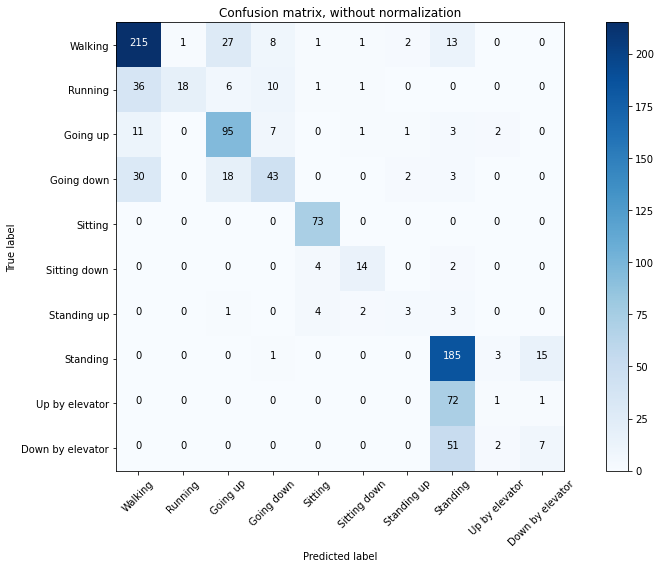

loss 0.42381 acc 0.59572: 100%|██████████| 500/500 [00:38<00:00, 12.35it/s]

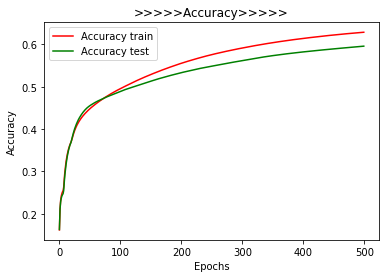

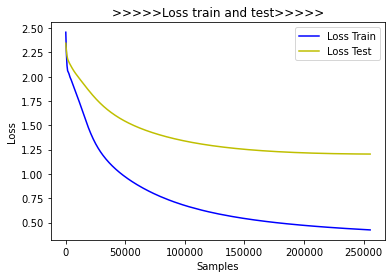

Accuracy de validación con kFold 0.6532986111111111
Accuracy Train: 0.68175 
Accuracy Test: 0.656 
Diferencia entre train y test: 0.02574999999999994

 


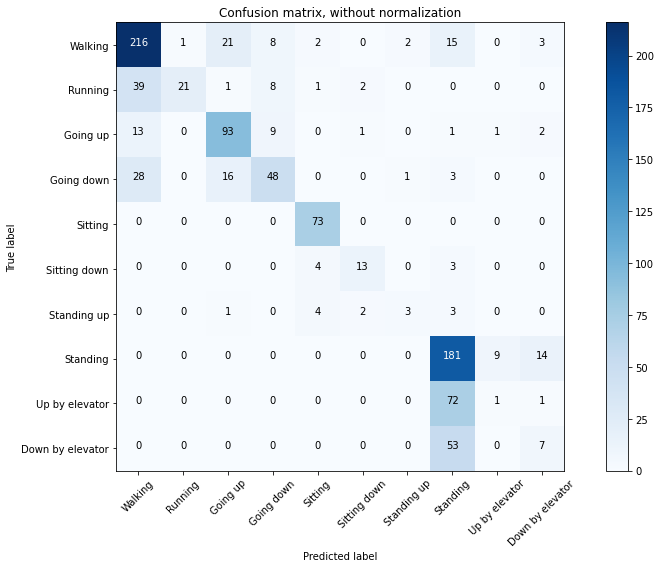

loss 0.38125 acc 0.59826:  98%|█████████▊| 490/500 [00:37<00:00, 13.14it/s]

OVERFFITING|Epochs: 490/500|Loss test old: 1.2795959119904017|loss test new: 1.2796356083179006


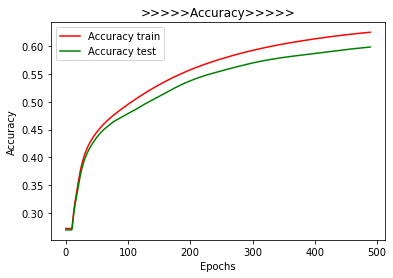

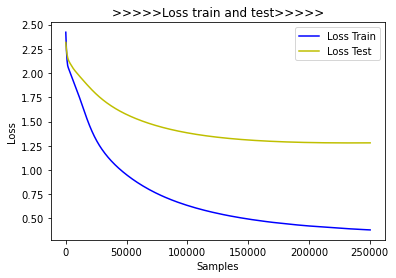

Accuracy de validación con kFold 0.6531756365740741
Accuracy Train: 0.67675 
Accuracy Test: 0.657 
Diferencia entre train y test: 0.019749999999999934

 


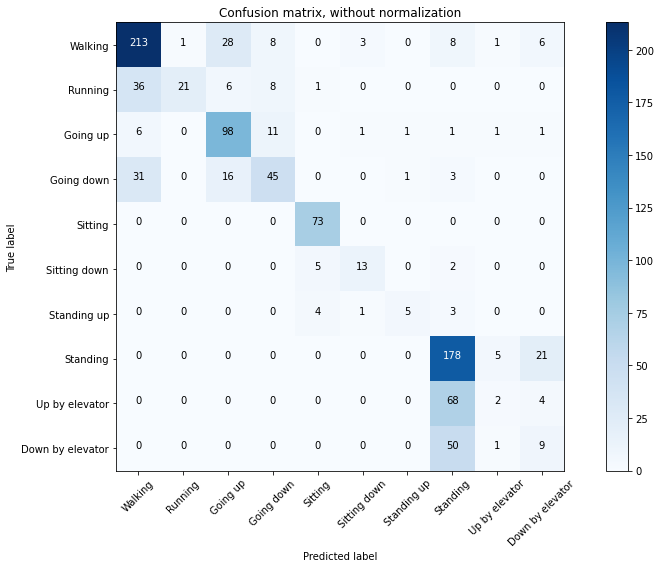

loss 0.43449 acc 0.60737: 100%|██████████| 500/500 [00:38<00:00, 13.11it/s]

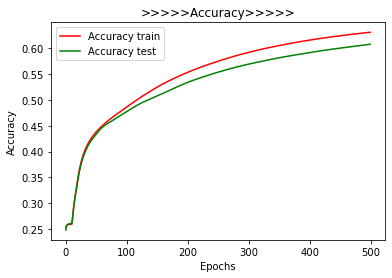

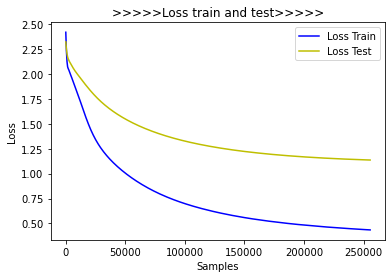

Accuracy de validación con kFold 0.6566220238095237
Accuracy Train: 0.685 
Accuracy Test: 0.658 
Diferencia entre train y test: 0.027000000000000024

 


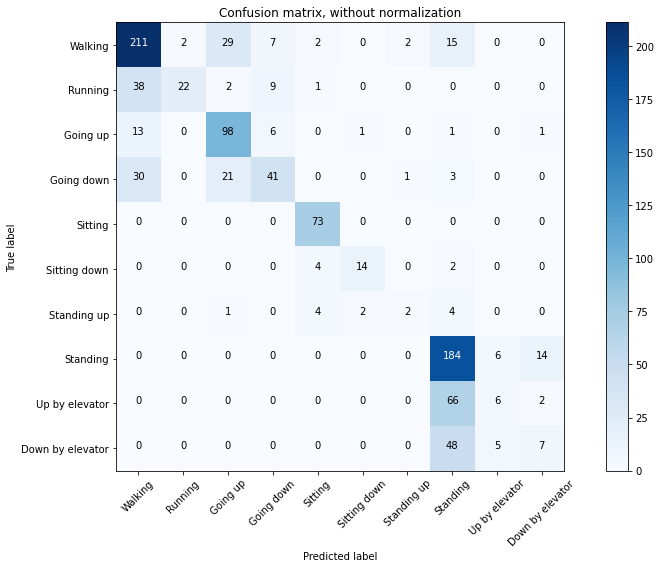

loss 0.42218 acc 0.60500: 100%|██████████| 500/500 [00:39<00:00, 12.93it/s]

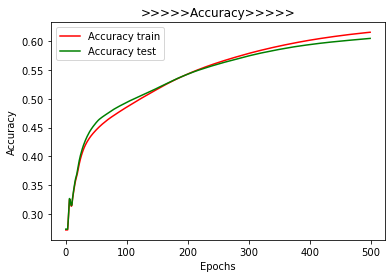

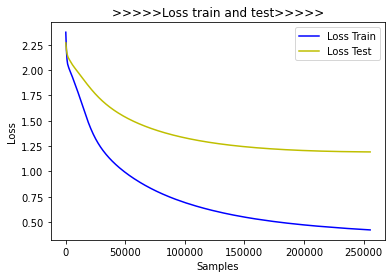

Accuracy de validación con kFold 0.6557888454861112
Accuracy Train: 0.666 
Accuracy Test: 0.658 
Diferencia entre train y test: 0.008000000000000007

 


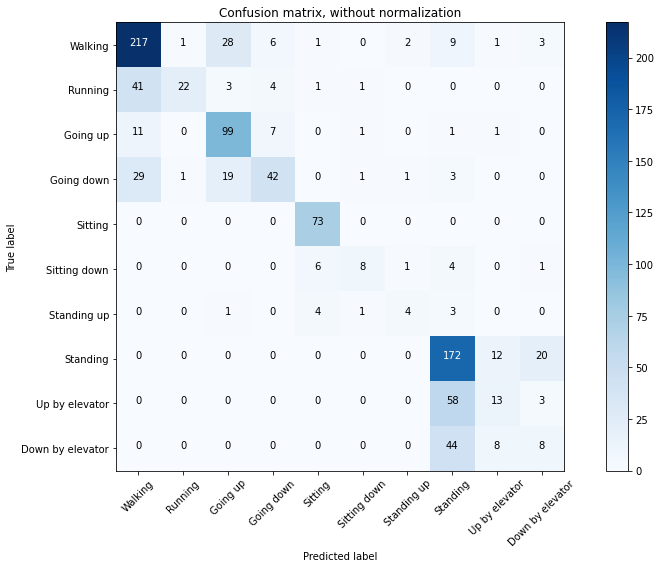

loss 0.42545 acc 0.62568: 100%|██████████| 500/500 [00:39<00:00, 12.51it/s]

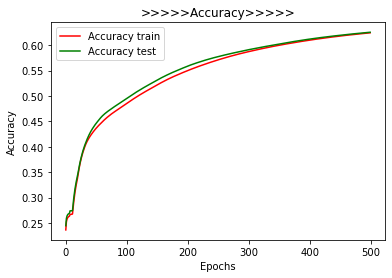

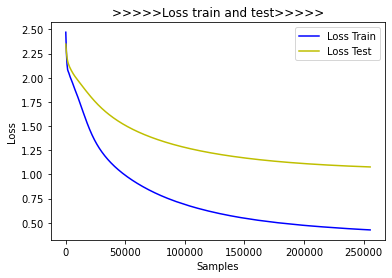

Accuracy de validación con kFold 0.658251350308642
Accuracy Train: 0.67725 
Accuracy Test: 0.653 
Diferencia entre train y test: 0.024249999999999994

 


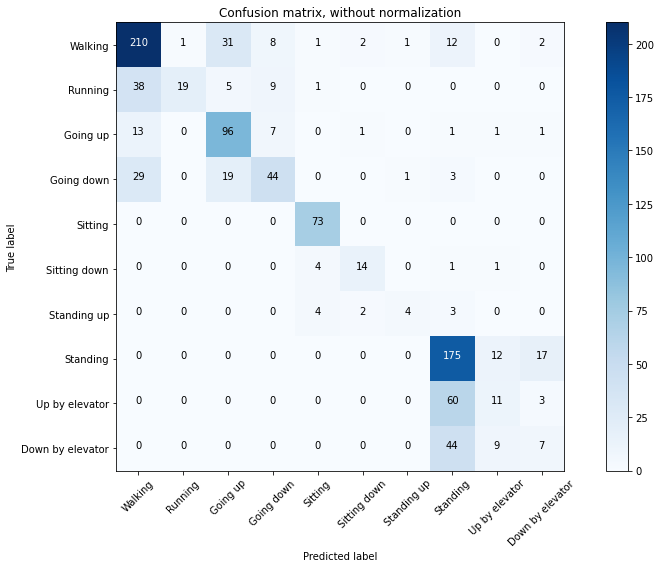

loss 0.42883 acc 0.59390: 100%|█████████▉| 499/500 [00:39<00:00, 12.59it/s]

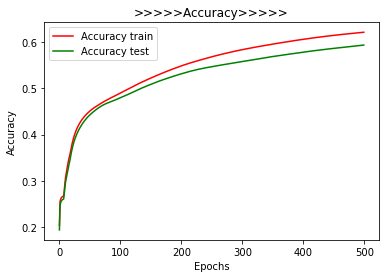

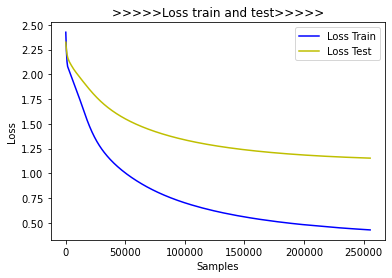

Accuracy de validación con kFold 0.6592013888888889
Accuracy Train: 0.67975 
Accuracy Test: 0.674 
Diferencia entre train y test: 0.005749999999999922

 


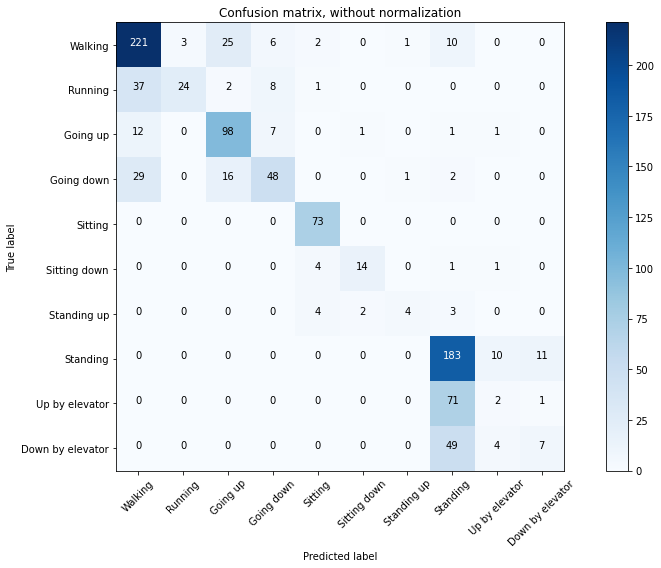

loss 2.20227 acc 0.26644:   0%|          | 1/500 [00:00<01:41,  4.93it/s]

Time: 7m 2.5625s
============ Launch with 5000 Samples, 500 Epochs, 256 Batch, 10 Splits, 0.001 lr, 1200 Hidden neurons ============


loss 0.39826 acc 0.62959: 100%|█████████▉| 499/500 [00:39<00:00, 12.61it/s]

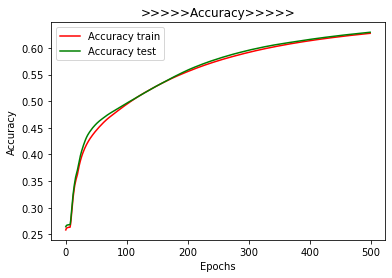

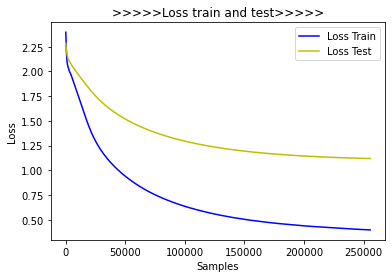

Accuracy de validación con kFold 0.6831597222222222
Accuracy Train: 0.67975 
Accuracy Test: 0.656 
Diferencia entre train y test: 0.023749999999999938

 


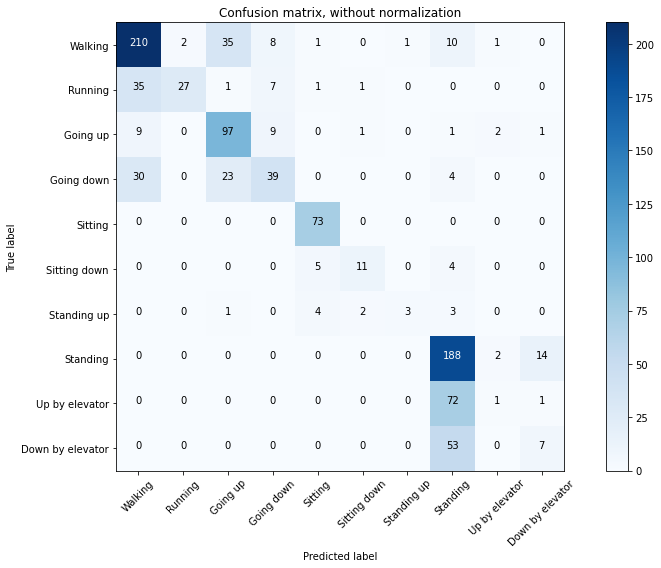

loss 0.40594 acc 0.60482: 100%|██████████| 500/500 [00:40<00:00, 12.96it/s]

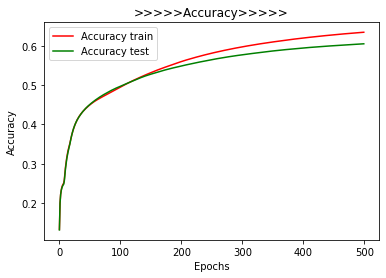

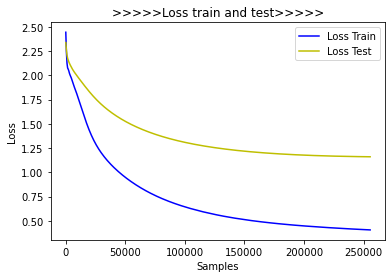

Accuracy de validación con kFold 0.6666666666666667
Accuracy Train: 0.68025 
Accuracy Test: 0.66 
Diferencia entre train y test: 0.02024999999999999

 


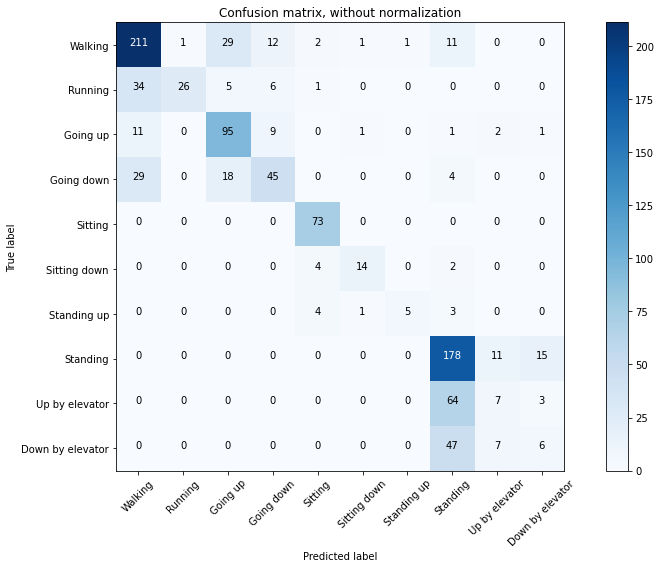

loss 0.41351 acc 0.60702: 100%|█████████▉| 499/500 [00:39<00:00, 12.13it/s]

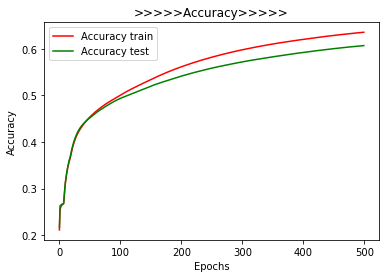

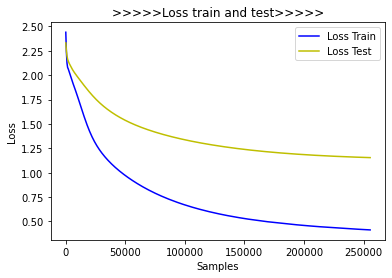

Accuracy de validación con kFold 0.6667390046296298
Accuracy Train: 0.688 
Accuracy Test: 0.668 
Diferencia entre train y test: 0.019999999999999907

 


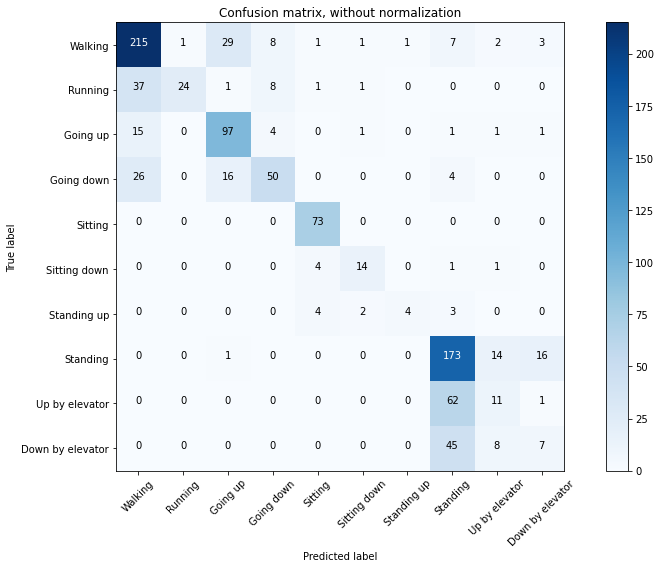

loss 0.38548 acc 0.58267: 100%|██████████| 500/500 [00:39<00:00, 12.54it/s]

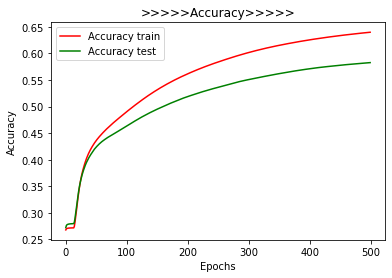

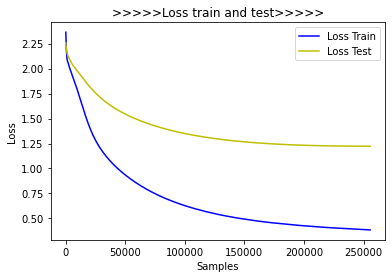

Accuracy de validación con kFold 0.6584743923611112
Accuracy Train: 0.687 
Accuracy Test: 0.665 
Diferencia entre train y test: 0.02200000000000002

 


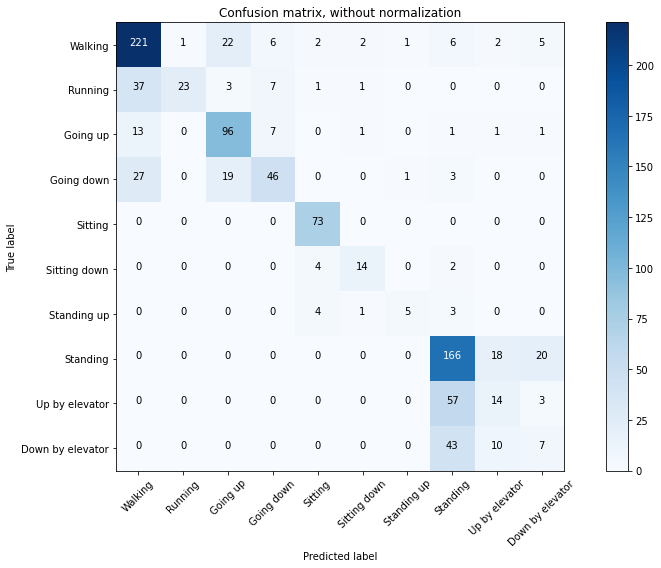

loss 0.40965 acc 0.63022: 100%|██████████| 500/500 [00:39<00:00, 12.59it/s]

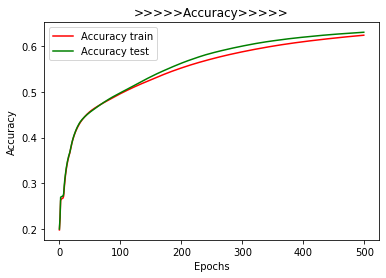

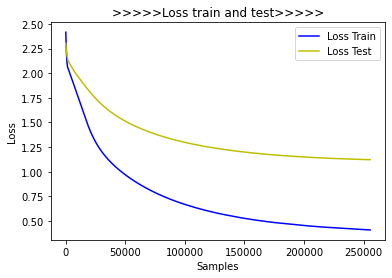

Accuracy de validación con kFold 0.6604600694444445
Accuracy Train: 0.67475 
Accuracy Test: 0.654 
Diferencia entre train y test: 0.020749999999999935

 


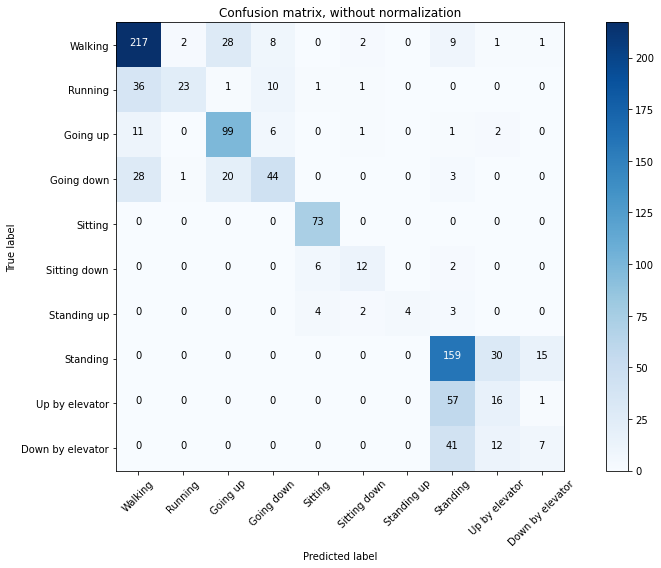

loss 0.40413 acc 0.64035: 100%|██████████| 500/500 [00:38<00:00, 12.71it/s]

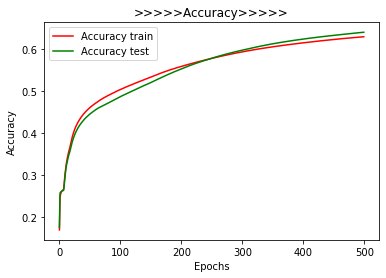

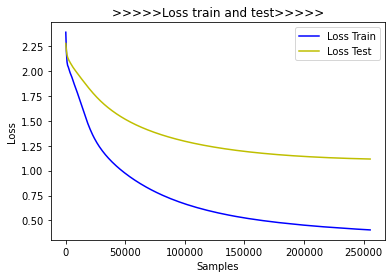

Accuracy de validación con kFold 0.6687644675925926
Accuracy Train: 0.6865 
Accuracy Test: 0.662 
Diferencia entre train y test: 0.024499999999999966

 


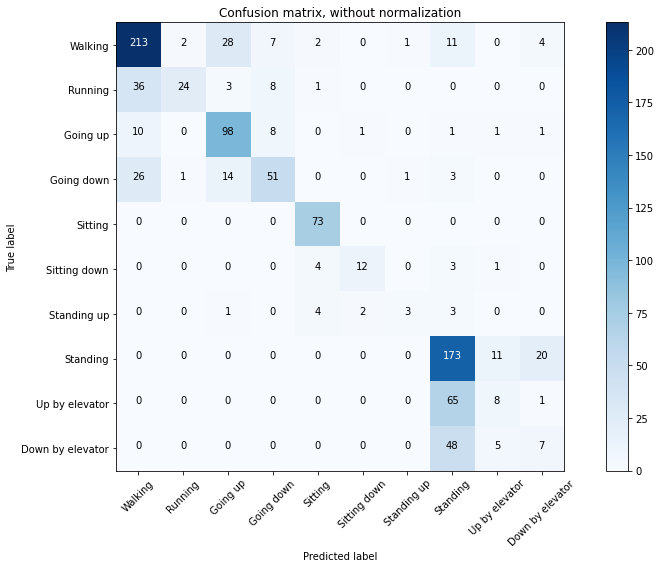

loss 0.40146 acc 0.60626: 100%|██████████| 500/500 [00:38<00:00, 12.42it/s]

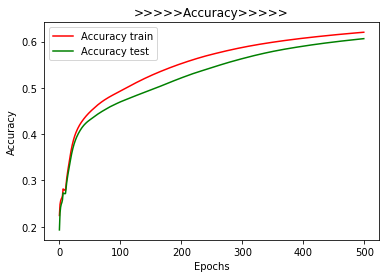

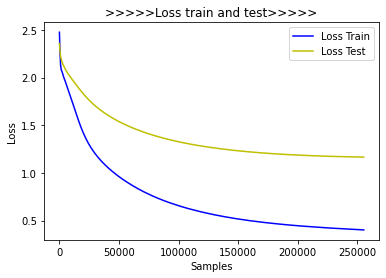

Accuracy de validación con kFold 0.6694568452380951
Accuracy Train: 0.67275 
Accuracy Test: 0.651 
Diferencia entre train y test: 0.021749999999999936

 


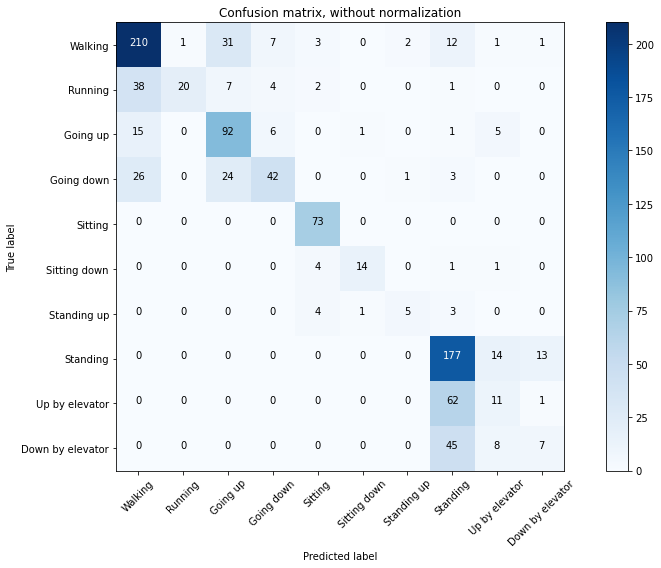

loss 0.42259 acc 0.58820: 100%|██████████| 500/500 [00:39<00:00, 12.63it/s]

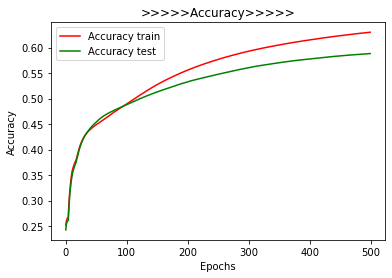

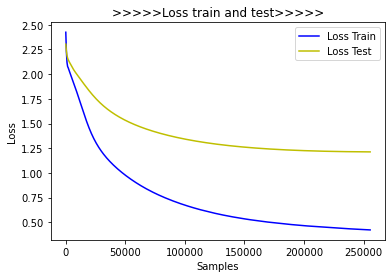

Accuracy de validación con kFold 0.6644694010416667
Accuracy Train: 0.6815 
Accuracy Test: 0.66 
Diferencia entre train y test: 0.021499999999999964

 


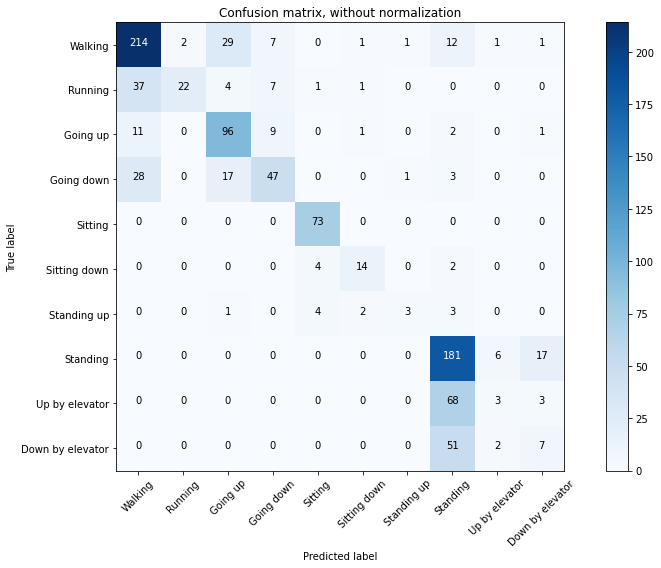

loss 0.43633 acc 0.60221: 100%|██████████| 500/500 [00:39<00:00, 12.60it/s]

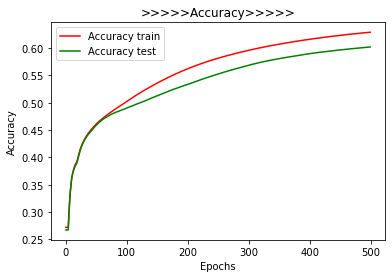

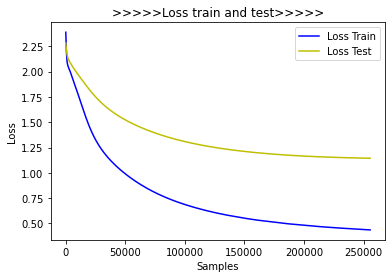

Accuracy de validación con kFold 0.6626398533950618
Accuracy Train: 0.6775 
Accuracy Test: 0.664 
Diferencia entre train y test: 0.013499999999999956

 


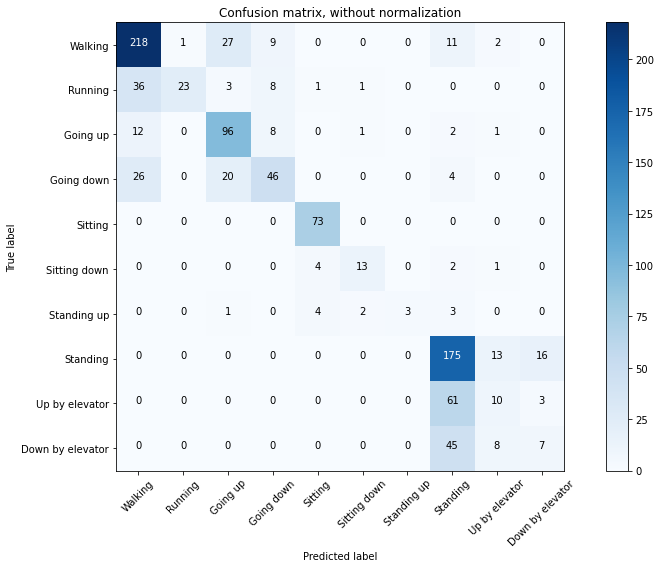

loss 0.42525 acc 0.59085: 100%|██████████| 500/500 [00:39<00:00, 12.67it/s]

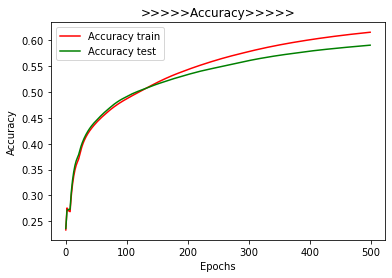

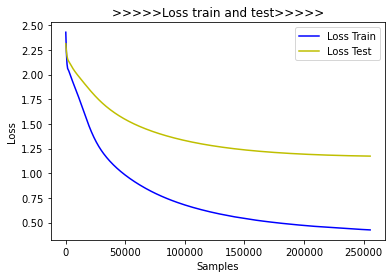

Accuracy de validación con kFold 0.6606987847222223
Accuracy Train: 0.67075 
Accuracy Test: 0.642 
Diferencia entre train y test: 0.028749999999999942

 


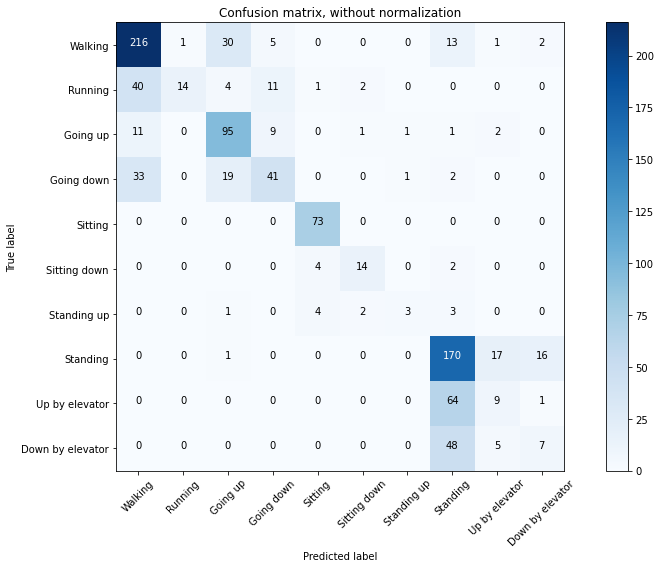

Time: 7m 9.5625s


In [17]:
list_times, list_neuron, list_acc_test = [], [], []
for hidden_size in range(900, 1200+1, 100):
    print(f'\033[1;36m============ Launch with {nSamples} Samples, {num_epochs} Epochs, {batch_size} Batch, {num_splits} Splits, {learning_rate} lr, {hidden_size} Hidden neurons ============\033[0;m')
    #  Llamo al metodo que implementa el K-fold
    time_mean, modelo_trained, loss_test_list, acc_test = Modulo_MLP.CV_Kfold(device, num_classes, input_size, X_train, 
                                                                   y_train,hidden_size,num_splits,batch_size,num_epochs,
                                                                   learning_rate, (X_test, y_test), modelo_pre_train)
    list_times.append(time_mean)
    list_neuron.append(hidden_size)
    list_acc_test.append(acc_test)
list_times = [z * int(1e9) for z in list_times]

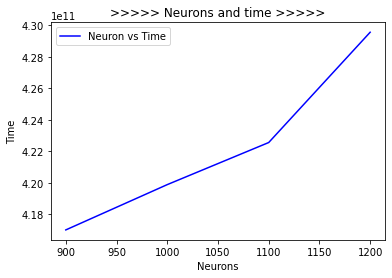

In [18]:
plt.plot(list_neuron,list_times,"b")
plt.legend(['Neuron vs Time'])
plt.xlabel('Neurons')
plt.ylabel('Time')
plt.title('>>>>> Neurons and time >>>>>')
plt.show()

In [19]:
list_times

[417015625000.0, 419890625000.0, 422562500000.0, 429562500000.0]

[0.6580999999999999, 0.6586000000000001, 0.659, 0.6582]


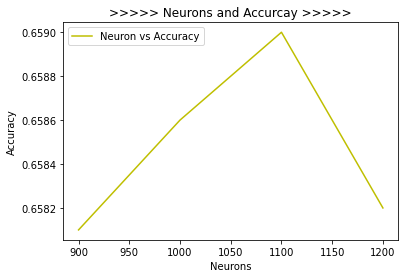

In [20]:
print(list_acc_test)
plt.plot(list_neuron, list_acc_test, "y")
plt.legend(['Neuron vs Accuracy'])
plt.xlabel('Neurons')
plt.ylabel('Accuracy')
plt.title('>>>>> Neurons and Accurcay >>>>>')
plt.show()


In [21]:
# # Muestro el tiempo medio del entrenamiento de mi red neuronal 
# if(time_mean> 3600):
#     print(f'\nTime: {int(time_mean/3600)}h {int((time_mean%3600)/60)}m {round((time_mean%3600)%60)}s')
# elif(time_mean> 60):
#     print(f'\nTime: {int(time_mean /60)}m {time_mean%60}s')
# else:
#     print(f'\nTime: {time_mean}')


In [22]:
# Calacular el accuracy de test con un conjunto nunca antes visto 
d = data[800000:900000]

# d = d[(d.act == 1) | (d.act == 2) | (d.act == 3) | (d.act == 4) | (d.act == 5) | (d.act == 6) | (d.act == 7) 
#         | (d.act == 8) | (d.act == 9) | (d.act == 12)]

X_t = d.drop(['act'], axis = 'columns')
y_t = d.act

Xt_tensor = torch.tensor(X_t.values).cuda()

yt_tensor = torch.tensor(y_t.values).cuda()

testset = torch.utils.data.TensorDataset(Xt_tensor,  yt_tensor)
test_loader = torch.utils.data.DataLoader(testset, batch_size = batch_size, shuffle=False)

accuracy_test = Modulo_MLP.evaluate(modelo_trained.to(device),test_loader)
print(f'Accuracy de test {accuracy_test}')


# #Guardo el modelo con el accuracy de tes
# # Scripting load
# acc_label = evaluate_aux(modelo_trained.to(device), test_loader)
# scripted_model_final = torch.jit.script(modelo_trained.cpu())
# # Scripting save
# from datetime import datetime
# now = datetime.now()
# scripted_model_final.save('modelo_final_'+str(now.date())+'_'+str(round(acc_label, 4))+'_Test'+'.zip')

Accuracy de test 0.6554727461636828


In [23]:
#Libera toda la memoria caché no utilizada de PyTorch
torch.cuda.empty_cache()